# FastAI
I am currently working my way through FastAI's MOOC released January 2019. Jeremy Howard continually indicates that you can get world class results in a few lines of code. I was admittedly skeptical, but working through the first lesson and apply the example code to a dataset of North American birds, I was able improve upon current state-of-the-art accuracy rate (86.03% versus 82.79%).

## Project Overview
The purpose of this project is to imporove upon the accuracies of the initial 2014 research paper [Bird Species Categorization Using Pose Normalized Deep Convolutional Nets](https://arxiv.org/pdf/1406.2952.pdf)​ (75% accuracy) and a current best results paper [Pairwise Confusion for Fine-Grained Visual Classication](http://openaccess.thecvf.com/content_ECCV_2018/papers/Abhimanyu_Dubey_Improving_Fine-Grained_Visual_ECCV_2018_paper.pdf)​ (82.79% accuracy) the using the FastAI library for deep learning image processing. The expectation is that the FastAI library will increase the speed and accuracy of bird identification while simultaneously reducing the code base.

## Data
The data for this project is available from [The CornellLab of Ornithology](http://dl.allaboutbirds.org/nabird) ​and is a collection of 48,000 photos featuring 555 species of North America's birds.

In [1]:
%reload_ext autoreload
%autoreload 2

from fastai.vision import *

In [2]:
path = "data/nabirds/images/"
path

'data/nabirds/images/'

## Transforms and Data Loading
Currently using FastAI default settings to get a baseline result, except the batch size (bs) has been reduced to 32 to accomodate my GPU and the image size (size) to better accomodate the NABirds image size. In the future, I will fine-tune parameters to improve upon results.

In [3]:
tfms = get_transforms()
data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms, size=384)
        .databunch(bs=24))

## View the Data
Currently the data labels are numbers and need to be compared with a text file (near future project to incorporate). Images appear to be importing fine and a spot check with the labels file and my amateur birding abilities the labels match the bird species.

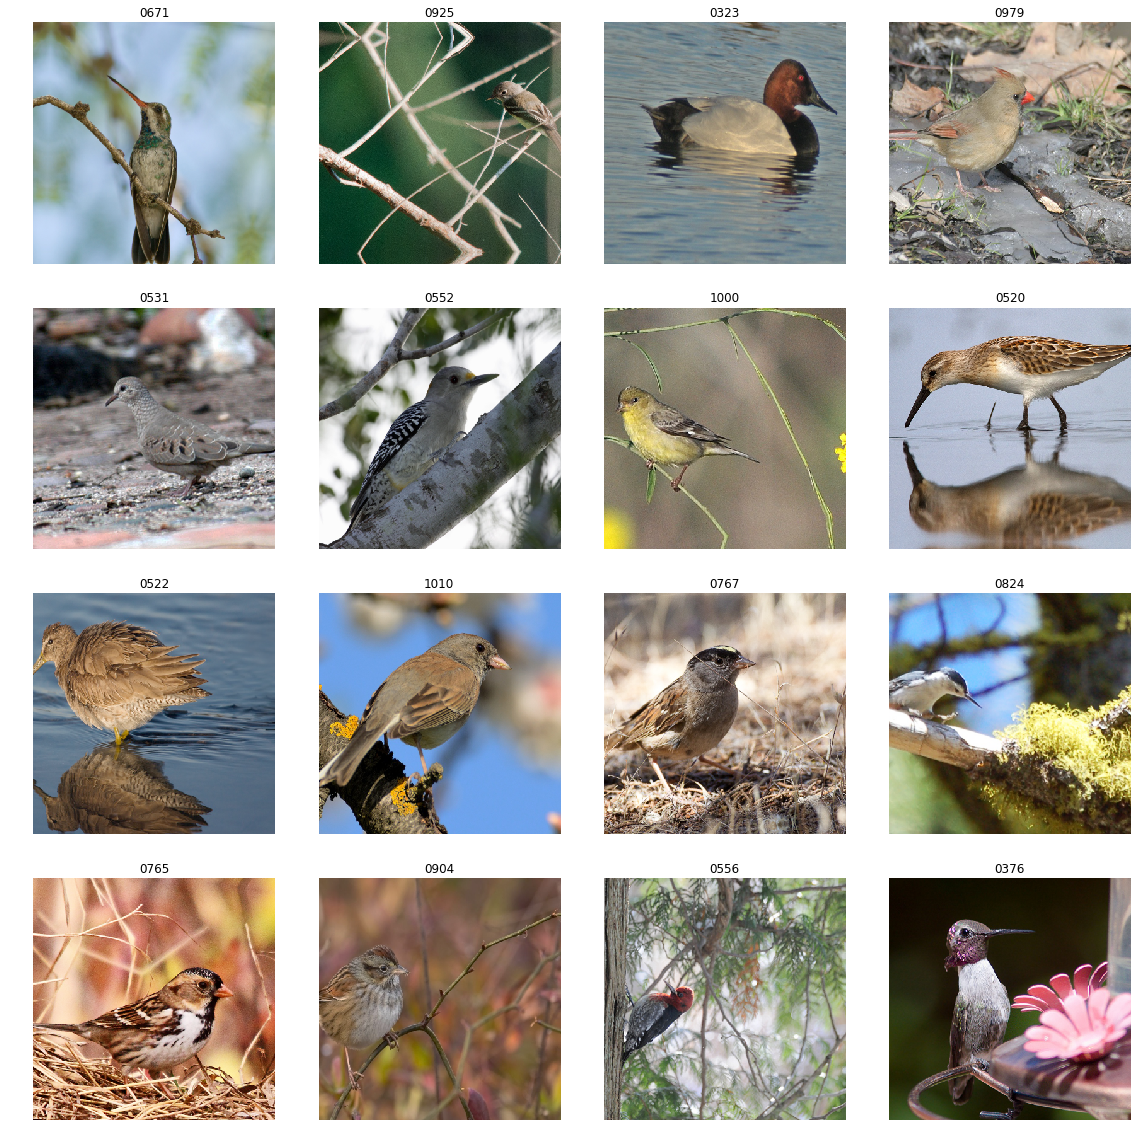

In [4]:
data.show_batch(rows=4)

## Model and Learning Rate

Again all FastAI default settings were used. Resnet34 backbone was used as an initial architecture. In the future will try the more complex resnet50 to investigate if improvements can be made.

In [4]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


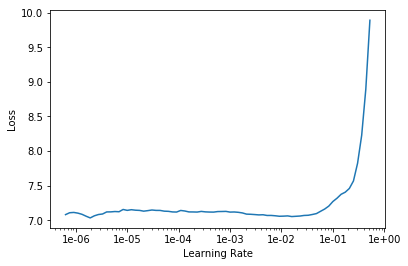

In [5]:
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy
1,1.695672,1.205347,0.684205
2,1.754018,1.257982,0.660626
3,2.092018,1.719176,0.562088
4,2.018008,1.548262,0.600906
5,1.875466,1.393935,0.635502
6,1.626894,1.156664,0.689456
7,1.426125,1.023057,0.728686
8,1.191486,0.883997,0.760400
9,0.981362,0.800364,0.777286
10,0.871404,0.719207,0.803233


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

## Prediction Results
Below are the top 9 worst predictions. There is a mix of species that are very similar and hard for humans to differentiate, poor image quality, and examples of proper species identification but incorrect male/female/immature or color phase identification.

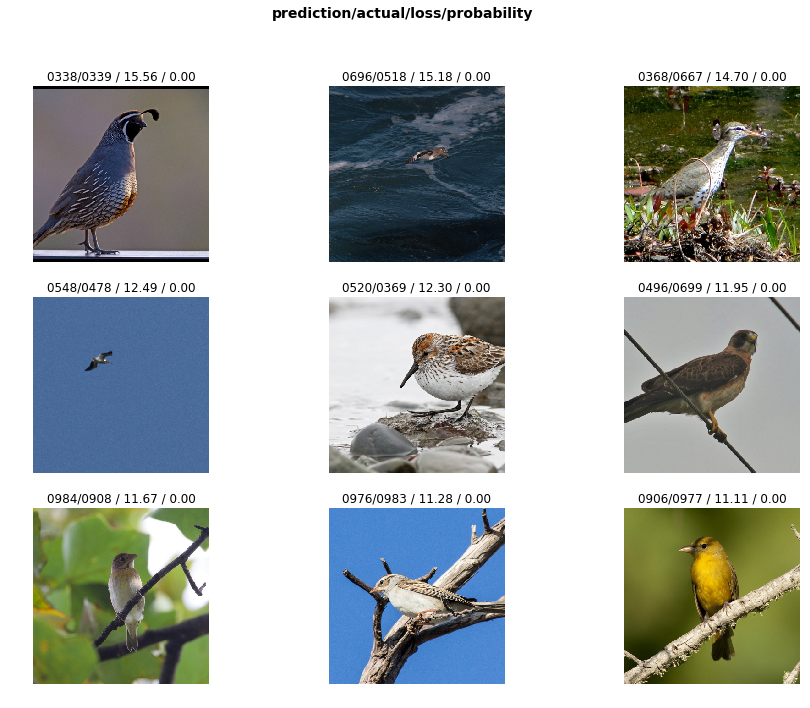

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

## Conclusion and Future Work
Initial results are extemely promising and I am hoping that with some parameter fine-tuning to push the accuracy to 90%.

To Do:
- Provide species names
- Try more complex deep learning backbone (resnet50)
- Fine-tune parameters and implement different image augmentation techniques
- Apply this work to a real time bird feeder cam